In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics
from sklearn.metrics import mean_squared_error

In [2]:
train=pd.read_csv("C:/Users/Jothy Natarajan/Downloads/Train.csv")
test=pd.read_csv("C:/Users/Jothy Natarajan/Downloads/Test.csv")

In [3]:
train.shape

(8523, 12)

In [4]:
test.shape

(5681, 11)

In [5]:
y=train.Item_Outlet_Sales
train.drop("Item_Outlet_Sales",axis=1,inplace=True)

In [6]:
mart=pd.concat([train,test], ignore_index=True)

In [7]:
mart.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1


In [8]:
mart.shape

(14204, 11)

In [9]:
mart.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
14199,FDB58,10.5,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
14200,FDD47,7.6,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
14201,NCO17,10.0,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
14202,FDJ26,15.3,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1
14203,FDU37,9.5,Regular,0.104720,Canned,79.7960,OUT045,2002,NaN,Tier 2,Supermarket Type1


<h2>EDA</h2>

In [10]:
mart= mart.astype({"Outlet_Establishment_Year": str}, errors='ignore') 

In [11]:
mart.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [12]:
mart.Item_Weight.describe()

count    11765.000000
mean        12.792854
std          4.652502
min          4.555000
25%          8.710000
50%         12.600000
75%         16.750000
max         21.350000
Name: Item_Weight, dtype: float64

In [13]:
mart.Item_Weight.fillna(mart.Item_Weight.median(),inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x1adb257b670>,
 'caps': [<matplotlib.lines.Line2D at 0x1adb257bcd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1adb257b220>],
 'medians': [<matplotlib.lines.Line2D at 0x1adb258b430>],
 'fliers': [<matplotlib.lines.Line2D at 0x1adb258b7c0>],
 'means': []}

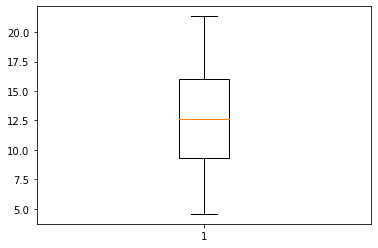

In [14]:
plt.boxplot(mart.Item_Weight)

In [15]:
mart.Item_Fat_Content.describe()

count       14204
unique          5
top       Low Fat
freq         8485
Name: Item_Fat_Content, dtype: object

In [16]:
mart.Item_Fat_Content=mart.Item_Fat_Content.replace("LF","Low Fat")
mart.Item_Fat_Content=mart.Item_Fat_Content.replace("low fat","Low Fat")
mart.Item_Fat_Content=mart.Item_Fat_Content.replace("reg","Regular ")
mart.Item_Fat_Content=mart.Item_Fat_Content.replace("Regular","Regular ")

In [17]:
mart.Item_Fat_Content.describe()

count       14204
unique          2
top       Low Fat
freq         9185
Name: Item_Fat_Content, dtype: object

In [18]:
mart.Item_Visibility.describe()

count    14204.000000
mean         0.065953
std          0.051459
min          0.000000
25%          0.027036
50%          0.054021
75%          0.094037
max          0.328391
Name: Item_Visibility, dtype: float64

In [19]:
Q1=mart.Item_Visibility.quantile(0.25)
Q3=mart.Item_Visibility.quantile(0.75)
IQR=Q3-Q1
UE=Q3+1.5*(IQR)
LE=Q1-1.5*(IQR)
mart.Item_Visibility[mart.Item_Visibility>UE]=UE
mart.Item_Visibility[mart.Item_Visibility<LE]=LE

C:\Users\Jothy Natarajan\AppData\Local\Temp/ipykernel_9092/1124756949.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mart.Item_Visibility[mart.Item_Visibility>UE]=UE
C:\Users\Jothy Natarajan\AppData\Local\Temp/ipykernel_9092/1124756949.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mart.Item_Visibility[mart.Item_Visibility<LE]=LE


{'whiskers': [<matplotlib.lines.Line2D at 0x1adb268b910>,
 'caps': [<matplotlib.lines.Line2D at 0x1adb2699070>,
 'boxes': [<matplotlib.lines.Line2D at 0x1adb268b580>],
 'medians': [<matplotlib.lines.Line2D at 0x1adb2699790>],
 'fliers': [<matplotlib.lines.Line2D at 0x1adb2699b20>],
 'means': []}

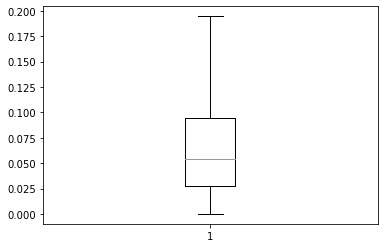

In [20]:
plt.boxplot(mart.Item_Visibility)

In [21]:
mart.Item_Type.describe()

count                     14204
unique                       16
top       Fruits and Vegetables
freq                       2013
Name: Item_Type, dtype: object

In [22]:
mart.Outlet_Establishment_Year.describe()

count     14204
unique        9
top        1985
freq       2439
Name: Outlet_Establishment_Year, dtype: object

In [23]:
mart.Outlet_Size.describe()

count      10188
unique         3
top       Medium
freq        4655
Name: Outlet_Size, dtype: object

In [24]:
mart.Outlet_Size.fillna("others",inplace=True)

In [25]:
mart.Outlet_Size.isnull().sum()

0

In [26]:
mart.drop(["Item_Identifier","Outlet_Identifier"],axis=1,inplace=True)

In [27]:
mart.shape

(14204, 9)

<h2> DUMMY VARIABLES</h2>

In [28]:
dummy=pd.get_dummies(mart)
dummy.head(5)

,Item_Weight,Item_Visibility,Item_MRP,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,...,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Size_others,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,1,0,0,0,0,0,1,...,1,0,0,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,0,1,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
2,17.50,0.016760,141.6180,1,0,0,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0
3,19.20,0.000000,182.0950,0,1,0,0,0,0,0,...,0,0,1,0,0,1,1,0,0,0
4,8.93,0.000000,53.8614,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0


In [29]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit(dummy)
scaled_data=scaler.transform(dummy)

In [30]:
x1= pd.DataFrame(scaled_data)

In [31]:
x1.shape

(14204, 41)

In [32]:
x=x1.iloc[:8523]
Test=x1.iloc[8523:]

In [33]:
x_train,x_test,y_train,y_test= train_test_split(x,y,train_size = 0.8, test_size = 0.2,random_state =42)  
model3=GradientBoostingRegressor(n_estimators=100,max_depth=2).fit(x_train,y_train)
model3.score(x_test,y_test)

0.6131695394697445

In [34]:
y_predicted4=model3.predict(x_test)

In [35]:
mean_squared_error(y_test,y_predicted4,squared=False)

1025.3748644163245

In [55]:
# predicting on actual test data
y_result = model3.predict(Test)
Y=pd.DataFrame(y_result)

In [56]:
result=pd.concat([test.Item_Identifier,test.Outlet_Identifier,Y],axis=1)

In [57]:
result

,Item_Identifier,Outlet_Identifier,0
0,FDW58,OUT049,1641.361584
1,FDW14,OUT017,1379.511415
2,NCN55,OUT010,750.970710
3,FDQ58,OUT017,2495.994938
4,FDY38,OUT027,5957.848703
...,...,...,...
5676,FDB58,OUT046,2136.512313
5677,FDD47,OUT018,2549.016517
5678,NCO17,OUT045,1883.866639
5679,FDJ26,OUT017,3496.729771


In [58]:
result.rename(columns={0:'Item_Outlet_Sales'}, inplace=True,)

In [59]:
result.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1641.361584
1,FDW14,OUT017,1379.511415
2,NCN55,OUT010,750.970710
3,FDQ58,OUT017,2495.994938
4,FDY38,OUT027,5957.848703


In [60]:
result.Item_Outlet_Sales[result.Item_Outlet_Sales<0]=-(result.Item_Outlet_Sales)

C:\Users\Jothy Natarajan\AppData\Local\Temp/ipykernel_9092/2442577006.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result.Item_Outlet_Sales[result.Item_Outlet_Sales<0]=-(result.Item_Outlet_Sales)


In [62]:
result.to_csv('D:/Work Space/Hackathon.csv',index= False)

In [63]:
result.shape

(5681, 3)